In [1]:
import tensorflow as tf
from tensorflow import keras

In [7]:

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)
train_images = train_images/255
test_images = test_images/255

In [8]:
print(train_images.shape)

(60000, 28, 28, 1)


In [4]:
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Deconvolution2D, UpSampling2D
from keras.models import Model

inputs = Input(shape=(28,28,1))
conv1 = Conv2D(filters=20,kernel_size=(3,3), activation='relu', padding='same') (inputs)
max1 = MaxPool2D((2,2)) (conv1)
conv2 = Conv2D(filters=20,kernel_size=(3,3), activation='relu', padding='same') (max1)
max2 = MaxPool2D((2,2)) (conv2)
conv3 = Conv2D(filters=1,kernel_size=(3,3),padding='same',activation='relu') (max2)

deconv3 = Deconvolution2D(filters=1,kernel_size=(3,3),padding='same',activation='relu') (max2)

upsampling1 = UpSampling2D((2,2)) (deconv3)
deconv2 = Deconvolution2D(filters=20, kernel_size=(3,3), activation='relu', padding='same') (upsampling1)
upsampling2 = UpSampling2D((2,2)) (deconv2)

#deconv2 = Deconvolution2D(filters=20,kernel_size=(3,3), activation='relu') (upsampling1)
inv_input =  Deconvolution2D(filters=1, kernel_size= (3, 3), activation='relu', padding='same') (upsampling2) # probably you will have a problem with padding
encoder = Model(inputs, max2)
denoising_autoencoder = Model(inputs, inv_input)

denoising_autoencoder.compile(optimizer='adam',loss='mean_squared_error')

Using TensorFlow backend.


In [5]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        3620      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
Total params: 3,820
Trainable params: 3,820
Non-trainable params: 0
_________________________________________________________________


In [6]:
denoising_autoencoder.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        3620      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 1)           181       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 1)         0   

In [7]:
history = denoising_autoencoder.fit(x=train_images,y=train_images, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 467s 8ms/step - loss: 1332.6873

In [3]:
DAE = keras.models.load_model('../Models/DAE2.h5')
DAE.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        3620      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 1)           181       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 1)           10  

In [26]:
from plot import plot_n_images

ModuleNotFoundError: No module named 'plot'

In [17]:
DAE.evaluate(test_images, test_images)

10000/10000 [==============================] - 27s 3ms/sample - loss: 0.2065 - acc: 0.4999

[0.20649940464496613, 0.49989578]

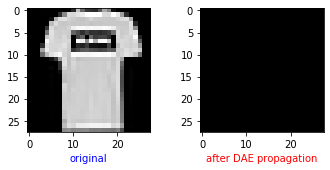

In [18]:
import matplotlib.pyplot as plt
def plot_n_images(images: list):
    plt.figure(figsize=(15, 5))
    N = len(images)

    for i in range(N):
        plt.subplot(2, 5, i + 1)
       # print(images[i].shape)
        nX, nY, _ = iter(images[i].shape)
        x = images[i].reshape((nX,nY))
       # print(x.shape)
        plt.imshow(x, cmap='gray')
        label = 'original'
        if i & 1 == 0:
            color = 'blue'
        else:
            color = 'red'
            label = 'after DAE propagation'
        plt.xlabel(label, color=color)

plot_n_images([train_images[1],DAE.predict(train_images[1].reshape((1,28,28,1)))[0]])


In [9]:
#%reset

Nothing done.
